# **POOLING LAYER**

Pooling layer adalah lapisan dalam Convolutional Neural Network (CNN) yang berfungsi untuk mengurangi ukuran data (downsampling) dengan cara mengambil nilai penting dari suatu area kecil, sehingga ukuran fitur menjadi lebih kecil namun informasi utama tetap dipertahankan.

## **Import Library**

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from PIL import Image
import matplotlib.pyplot as plt

- torch : digunakan untuk membuat tensor dan operasi matematika.

- nn : modul neural network, termasuk pooling.

- transforms :untuk preprocessing citra.

- CIFAR10 : dataset contoh, namun tidak ikut dipakai di bagian awal.

- Image : untuk buka gambar jika diperlukan.

- matplotlib.pyplot : visualisasi hasil pooling.

## **Membuat Input Tensor 4×4**

In [2]:
input_tensor = torch.tensor([[[[1., 3., 2., 4.],
                              [5., 6., 1., 2.],
                              [1., 2., 3., 4.],
                              [2., 1., 4., 3.]]]], dtype=torch.float32)

print("Input Tensor Shape:", input_tensor.shape)
print("Input Tensor:\n", input_tensor)

Input Tensor Shape: torch.Size([1, 1, 4, 4])
Input Tensor:
 tensor([[[[1., 3., 2., 4.],
          [5., 6., 1., 2.],
          [1., 2., 3., 4.],
          [2., 1., 4., 3.]]]])


Membuat tensor 1 batch, 1 channel, ukuran 4×4.

Format tensor = (batch, channel, height, width) → (1, 1, 4, 4)

## **Max Pooling**

Max pooling adalah operasi pooling yang memilih elemen maksimum dari wilayah peta fitur yang ditutupi oleh filter.

In [9]:
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

- MaxPool2d(2,2) berarti mengambil nilai terbesar dari setiap blok 2×2.

- Stride = 2 - berarti jendelanya melompat 2 piksel setiap kali, jadi kotak-kotaknya tidak saling tumpang tindih.

* Pooling bekerja dengan cara menggeser jendela kernel (misal 2×2, 3×3, dll) di atas gambar.

* Jika stride = ukuran jendela, jendela itu selalu pindah tepat sebesar ukurannya, sehingga tidak ada bagian gambar yang diambil dua kali.

* Jika stride lebih kecil dari ukuran jendela, jendelanya bergeser lebih pendek dari ukurannya, sehingga ada bagian gambar yang tertutup lagi oleh jendela berikutnya, alias overlap.

In [10]:
output_max = max_pool(input_tensor)

In [11]:
print("\nOutput Max Pooling Shape:", output_max.shape)
print("Output Max Pooling:\n", output_max)


Output Max Pooling Shape: torch.Size([1, 1, 2, 2])
Output Max Pooling:
 tensor([[[[6., 4.],
          [2., 4.]]]])


Kernel melompat 2 langkah setiap geser:

[1 3 | 2 4]

[5 6 | 1 2]



---



[1 2 | 3 4]

[2 1 | 4 3]

Sehingga dihasilkan output:

[6 | 4]

[2 | 4]



## **Average Pooling**

Average pooling menghitung rata-rata elemen yang terdapat di wilayah peta fitur yang ditutupi oleh filter.

In [ ]:
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

AvgPool2d mengambil nilai rata-rata dari setiap blok 2×2.

In [ ]:
output_avg = avg_pool(input_tensor)

In [ ]:
print("\nOutput Avg Pooling Shape:", output_avg.shape)
print("Output Avg Pooling:\n", output_avg)


Output Avg Pooling Shape: torch.Size([1, 1, 2, 2])
Output Avg Pooling:
 tensor([[[[3.7500, 2.2500],
          [1.5000, 3.5000]]]])


Contoh blok kiri-atas:

(1 + 3 + 5 + 6) / 4 = 3.75

## **Global Max Pooling**

Global Max Pooling (GMP) adalah teknik dalam jaringan saraf konvolusional yang digunakan untuk mereduksi dimensi feature map dengan cara mengambil nilai maksimum dari setiap channel. Artinya, dari seluruh nilai dalam sebuah channel (misalnya matriks 7×7 atau 14×14), hanya angka terbesar yang dipilih sebagai representasi channel tersebut.

In [ ]:
global_max_pool = nn.AdaptiveMaxPool2d((1, 1))

nn.AdaptiveMaxPool2d((1,1)) berarti output pooling dipaksa menjadi ukuran **1×1**, berapapun ukuran inputnya.

---

“Global” berarti melibatkan seluruh area dari feature map.

Maka Global Max Pooling akan mengubah semua piksel dalam 1 channel menjadi **satu angka** (yang paling terbesar).

In [ ]:
output_gmp = global_max_pool(input_tensor)

In [ ]:
print("\nOutput Global Max Pooling Shape:", output_gmp.shape)
print("Output Global Max Pooling:\n", output_gmp)


Output Global Max Pooling Shape: torch.Size([1, 1, 1, 1])
Output Global Max Pooling:
 tensor([[[[6.]]]])


## **Global Average Pooling**

Global Average Pooling (GAP) adalah teknik yang digunakan dalam jaringan saraf konvolusional (CNN) untuk mereduksi dimensi spasial dari peta fitur (feature maps) menjadi satu nilai tunggal per channel. Mirip dengan Global Max Pooling, namun GAP menghitung rata-rata semua nilai dalam sebuah feature map.

In [ ]:
global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

nn.AdaptiveAvgPool2d((1,1)) berarti output pooling dipaksa menghitung rata-rata dan menjadikannya ukuran **1×1**, berapapun ukuran inputnya.

In [ ]:
output_gap = global_avg_pool(input_tensor)

Karena input berukuran (1, 1, 4, 4), maka GAP dihitung dengan:

Output-nya menjadi:

In [ ]:
print("\nOutput Global Avg Pooling Shape:", output_gap.shape)
print("Output Global Avg Pooling:\n", output_gap)


Output Global Avg Pooling Shape: torch.Size([1, 1, 1, 1])
Output Global Avg Pooling:
 tensor([[[[2.7500]]]])


# **Perbandingan Inti Pooling Biasa dan Global Pooling**

| Fitur            | Pooling Biasa            | Global  Pooling                            |
| ---------------- | ---------------------------- | ------------------------------------------------- |
| Bisa atur kernel | ✔️ Ya                        | ❌ Tidak                                           |
| Bisa atur stride | ✔️ Ya                        | ❌ Tidak                                           |
| Output tetap     | ❌ Tergantung kernel & stride | ✔️ Selalu (1,1)                                   |
| Tujuan           | Downsampling bertahap        | Ringkas fitur menjadi 1 nilai                     |
| Digunakan di     | middle layer CNN             | final layer CNN (EfficientNet, ResNet, MobileNet) |


## **Implementasi pada Citra**

In [ ]:
# Muat gambar dari CIFAR-10
dataset = CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
image_tensor, _ = dataset[0]
image_tensor = image_tensor.unsqueeze(0)

In [ ]:
# Ubah ke grayscale untuk visualisasi
to_gray = transforms.Grayscale()
image_gray = to_gray(image_tensor).unsqueeze(0) if len(image_tensor.shape) == 3 else to_gray(image_tensor)

 #### **Max Pooling**

In [ ]:
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)

In [ ]:
max = max_pool(image_gray)

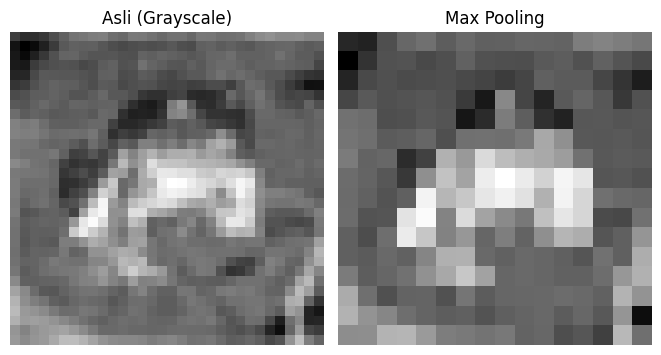

In [ ]:

# Visualisasi
def show_image(tensor, title):
    img = tensor.squeeze().detach().cpu().numpy()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
show_image(image_gray, "Asli (Grayscale)")
plt.subplot(1, 3, 2)
show_image(max, "Max Pooling")
plt.tight_layout()
plt.show()

#### **Average Pooling**

In [ ]:
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

In [ ]:
avg = avg_pool(image_gray)

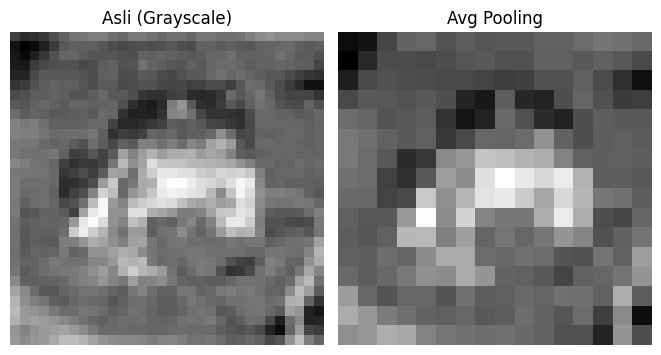

In [ ]:
# Visualisasi
def show_image(tensor, title):
    img = tensor.squeeze().detach().cpu().numpy()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
show_image(image_gray, "Asli (Grayscale)")
plt.subplot(1, 3, 2)
show_image(avg, "Avg Pooling")
plt.tight_layout()
plt.show()

# **Latihan**

Buatlah input shape baru, kemudian terapkan pada pooling layer dengan melakukan perubahan pada ukuran kernel atau pada nilai stride.